# Throughput

In [14]:
from utils import *
import matplotlib.pyplot as plt

In [15]:
# t1 = 'baseline-20k-10s'
# t2 = 'baseline-40k-10s'
# data1 = get_mixrw_rate('../results/{}/'.format(t1), step=10)
# data2 = get_mixrw_rate('../results/{}/'.format(t2), step=10)

trials = ['MRW-80k-40k-20s', 'MRW-60k-30k-20s']
data = {}
for t in trials:
    data[t] = get_mixrw_rate('../results/{}/'.format(t), step=10)

files:
../results/MRW-80k-40k-20s/MIXREADWRITE-0.0.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.1.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.2.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.3.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.4.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.5.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.6.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.7.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.8.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-0.9.dat
../results/MRW-80k-40k-20s/MIXREADWRITE-1.0.dat
files:
../results/MRW-60k-30k-20s/MIXREADWRITE-0.0.dat
../results/MRW-60k-30k-20s/MIXREADWRITE-0.1.dat
../results/MRW-60k-30k-20s/MIXREADWRITE-0.2.dat
../results/MRW-60k-30k-20s/MIXREADWRITE-0.3.dat
../results/MRW-60k-30k-20s/MIXREADWRITE-0.4.dat
../results/MRW-60k-30k-20s/MIXREADWRITE-0.5.dat
../results/MRW-60k-30k-20s/MIXREADWRITE-0.6.dat
../results/MRW-60k-30k-20s/MIXREADWRITE-0.7.dat
../results/MRW-60k-30k-20s/MIXREADWRITE-0.8.dat
../results/MRW-60k-30k-20s

In [16]:
avg = {}
for t in trials:
    data_iter = data[t]
    avg_iter = {}
    for i, d in data_iter.items():
        avg_iter[i] = avg_rate(d, filter=3)
    avg[t] = avg_iter

# avg1 = {}
# for i, d in data1.items():
#     avg1[i] = avg_rate(d, filter=3)

# avg2 = {}
# for i, d in data2.items():
#     avg2[i] = avg_rate(d, filter=3)

(120, 2) 5.838211026
(115, 2) 34.805241137
(112, 2) 34.206815715
(110, 2) 31.609509485
(107, 2) 29.205557775
(105, 2) 26.20766543
(102, 2) 28.809523807
(102, 2) 24.806656406
(100, 2) 26.610214093
(96, 2) 24.618979869
(120, 2) 20.411346763
(115, 2) 6.045926579
(114, 2) 26.810543686
(113, 2) 24.609118104
(112, 2) 29.612485268
(113, 2) 27.207048299
(113, 2) 23.407668377
(110, 2) 25.2147618
(109, 2) 21.811997899
(108, 2) 21.21169462
(102, 2) 21.216830214
(117, 2) 18.822121811


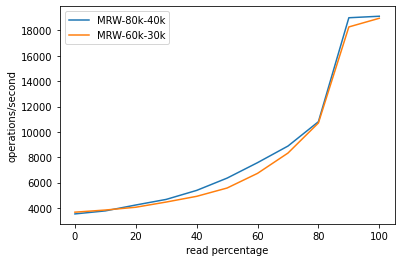

In [17]:
x = {}
y = {}
for t in trials:
    avg_iter = avg[t]
    x_iter = []
    y_iter = []
    for k, v in avg_iter.items():
        x_iter.append(k * 100)
        y_iter.append(v)
    x[t] = x_iter
    y[t] = y_iter

plt.figure()
for t in trials:
    plt.plot(x[t], y[t])
plt.xlabel('read percentage')
plt.ylabel('operations/second')
legend = []
for t in trials:
    legend.append(t[0:11])
plt.legend(legend)
plt.show()

# Latency

In [18]:
op = 'MIXREADWRITE'
N = 11
ratio = []
for i in range(0, 101, 10):
    ratio.append(i/100)
ops = []
for r in ratio:
    ops.append('{}-{:.1f}'.format(op, r))
print(ops)

['MIXREADWRITE-0.0', 'MIXREADWRITE-0.1', 'MIXREADWRITE-0.2', 'MIXREADWRITE-0.3', 'MIXREADWRITE-0.4', 'MIXREADWRITE-0.5', 'MIXREADWRITE-0.6', 'MIXREADWRITE-0.7', 'MIXREADWRITE-0.8', 'MIXREADWRITE-0.9', 'MIXREADWRITE-1.0']


In [19]:
trials = ['baseline-20k-30s-1']

plt.figure()
for t in trials:
    files = {} # {op, files}
    for i in range(N):
        r = ratio[i]
        o = ops[i]
        files[r] = get_files('latency', o, prefix='../results/{}/'.format(t))

    data = {}
    for i in range(N):
        r = ratio[i]
        data_iter = {}
        for f in files[r]:
            data_iter[f[0]] = get_data(f)
        data[r] = data_iter

    avg_per_client = {}
    for i in range(N):
        r = ratio[i]
        avg_per_client[r] = avg_latency_per_client(data[r])

    avg = {}
    for i in range(N):
        r = ratio[i]
        avg[r] = avg_latency(avg_per_client[r])
    # print(avg)
    x = []
    y = []
    for k, v in avg.items():
        x.append(k)
        y.append(v)
    plt.plot(x, y)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../results/baseline-20k-30s-1/'